In [1]:
import sys, os
sys.path.append(os.path.join('..'))

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import torch
import torch.nn as nn

In [2]:
# Plot defaults
# Set font default
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00',
                    '#000000']
matplotlib.rcParams['mathtext.rm'] = 'stix'
matplotlib.rcParams['mathtext.it'] = 'stix'
matplotlib.rcParams['mathtext.bf'] = 'stix'


matplotlib.rcParams["axes.formatter.limits"] = (-99, 99) #makes scientific notation threshold high
#plt.rcParams['font.family'] = 'serif'  # or 'DejaVu Serif'
#plt.rcParams['font.serif'] = ['Times New Roman']  # 'DejaVu Serif' 'serif' 'Times
# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble'] = r

# \usepackage{amsmath}
'''
'''

tickfontsize = 40
fontsize = 40
linewidth = 4
markersize = 15

SMALL_SIZE = tickfontsize
MEDIUM_SIZE = tickfontsize
BIGGER_SIZE = fontsize

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

shapes = ['o','s','^','D','*', 'x', 'P', 'h', 'v', '<', '>', 'X', 'd', 'p', '|', '_', '.', ',']

In [8]:
dir = 'models/trained_models/'
ss = {}

for state in ['on','off']:
    ss[state] = torch.load(dir + f'smooth_x_y_grid_subsampling_{state}.pt', map_location=torch.device('cpu'))


In [12]:
test_err = {}
epoch_timings = {}
time = {}

for state in ['on','off']:
    test_err[state] = np.array( ss[state]['test_err'] )
    epoch_timings[state] = np.array( ss[state]['epoch_timings'] )
    time[state] = np.cumsum( epoch_timings[state] )

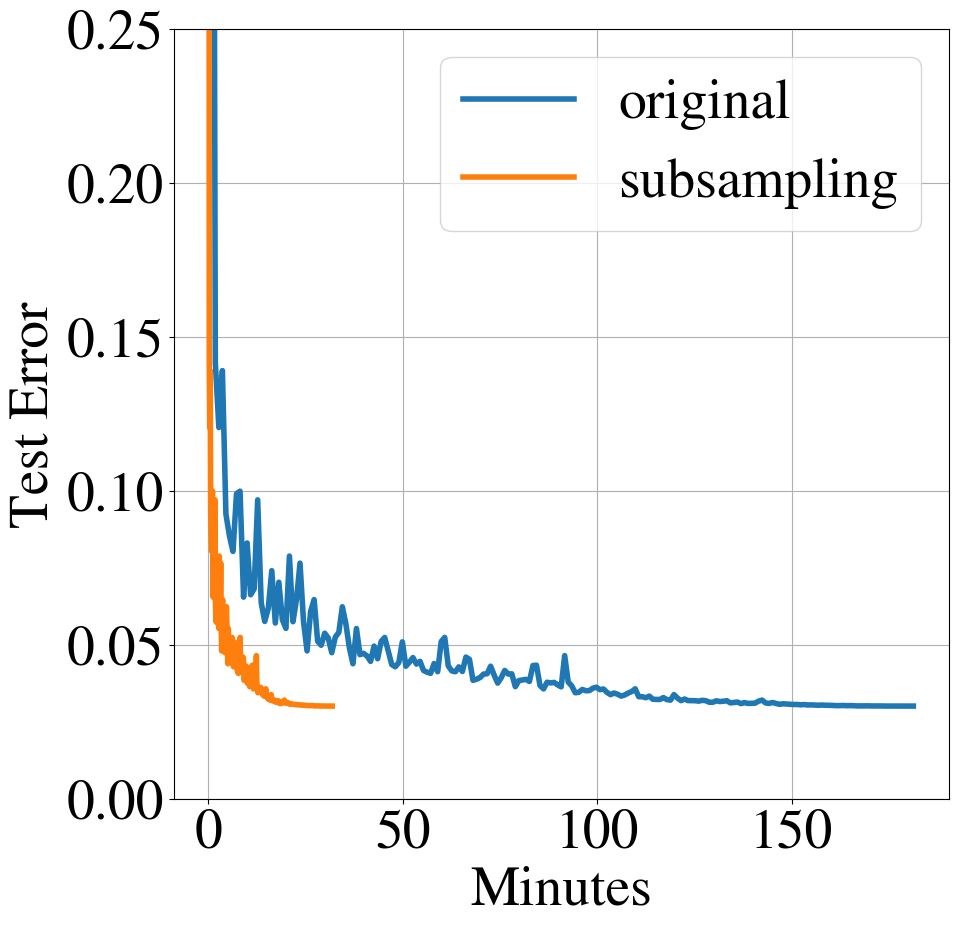

In [14]:

plt.figure(figsize=(10,10))
plt.plot(time['off']/60, test_err['on'],
         time['on']/60, test_err['on'],
         linewidth = linewidth,)
#plt.xlim([0,2000])
plt.ylim([0,0.25])
plt.xlabel('Minutes')
plt.ylabel('Test Error')
plt.legend(['original', 'subsampling'])
plt.grid()
plt.savefig('figs/subsampling_err_vs_time.pdf')
plt.show()

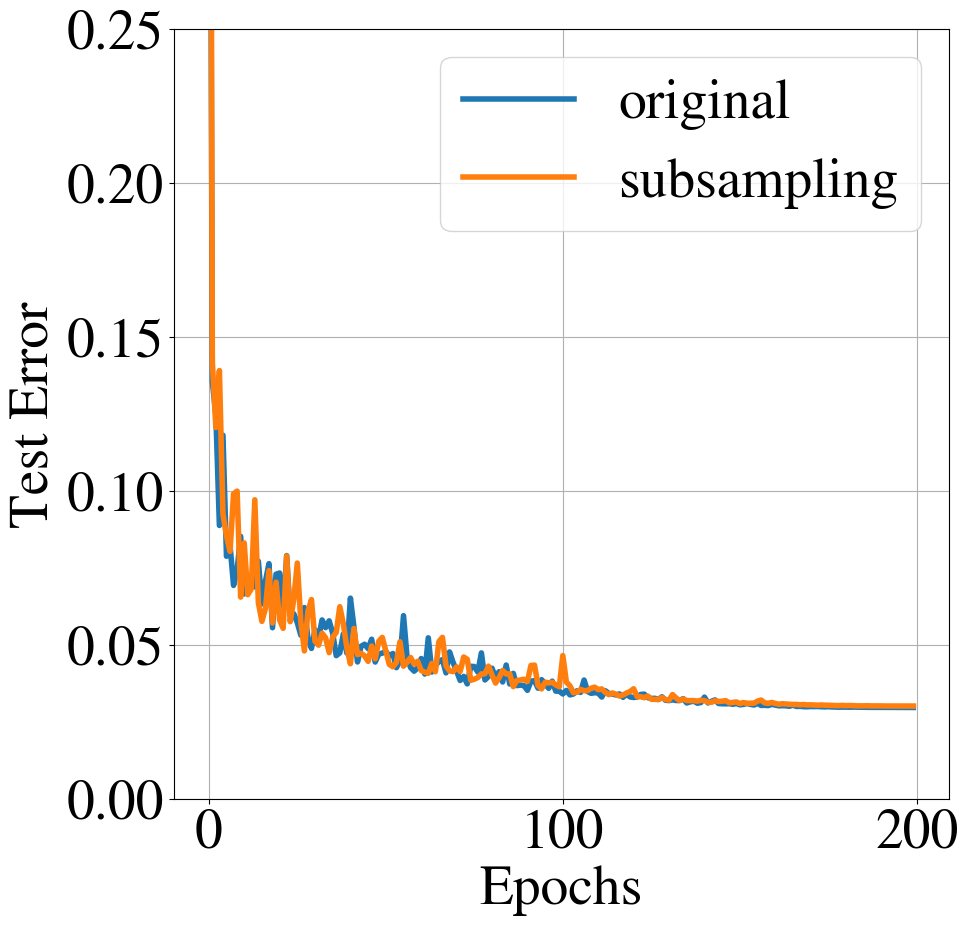

In [16]:

plt.figure(figsize=(10,10))
plt.plot(np.arange(len(test_err['off'])), test_err['off'],
         np.arange(len(test_err['on'])), test_err['on'],
         linewidth = linewidth)
#plt.xlim([0,2000])
plt.ylim([0,0.25])
plt.xlabel('Epochs')
plt.ylabel('Test Error')
plt.legend(['original', 'subsampling'])
plt.grid()
plt.savefig('figs/subsampling_err_vs_epochs.pdf')
plt.show()

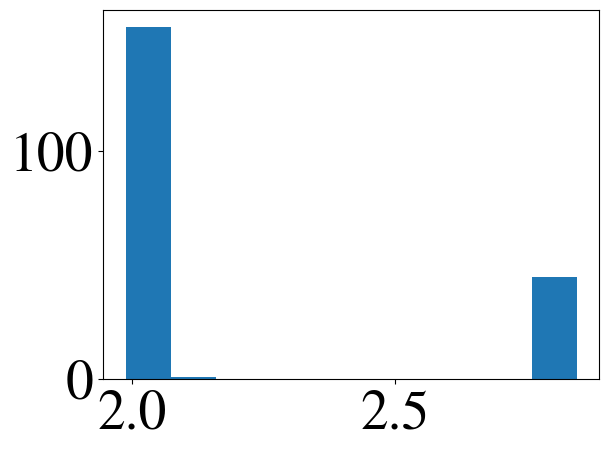

In [18]:
plt.figure()
plt.p(np.log(epoch_timings['on']))
plt.show()